### Student Information
Name: 林頎桓

Student ID: 113065518

GitHub ID: chihuan-lin

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## 1. Data Source
The data is contained in `Reddit-stock-sentiment.csv`. It contains posts and comments from various stock-related subreddits. For each post/comment, we have the number of upvotes/downvotes, polarity as well as sentiment etc.

## 2. Data Preparation

Import Reddit data with Pandas and preview the data.

In [468]:
import os
import pandas as pd

DATA_PATH = os.path.join('newdataset', 'Reddit-stock-sentiment.csv')
raw_df = pd.read_csv(DATA_PATH)

raw_df.info()
raw_df.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,"Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history",Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and ...,Btankersly66,https://apnews.com/article/trump-truth-social-djt-tesla-musk-tariffs-pause-fccfa6b06c8f1ec0cd7844641ca52669,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0


---

### >>> Exercise 1
In this exercise, please print out the *text* data for the first three samples in the dataset.

In [469]:
# Answer here
for i in range(3):
    print(f"Example {i+1}:")
    print(raw_df.text[i])

Example 1:
Calls on retards
Example 2:
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Example 3:
Seeing lots of red in the ticker.


---

## 3. Data Transformation

Transform/filter columns and add `sentiment_label` column to the dataframe (transform sentiment values into labels). The resulting dataframe is `reddit_df`.

In [470]:
sentiment_map = {-1.0: 'negative', 0.0: 'neutral', 1.0: 'positive'}
reddit_df = raw_df.copy()
reddit_df['datetime'] = pd.to_datetime(reddit_df['datetime'], errors='coerce') # Convert datetime string to pandas datetime object
reddit_df['text'] = (
    reddit_df['text'].fillna('')
                    .astype(str)
                    .str.replace(r'\s+', ' ', regex=True) # Replace runs of whitespace with a single space
                    .str.strip() # Trim ends
)
reddit_df['sentiment_label'] = reddit_df['sentiment'].map(sentiment_map)
reddit_df = reddit_df[['type', 'datetime', 'subreddit', 'title', 'upvotes', 'text', 'sentiment_label']]

reddit_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   type             847 non-null    object        
 1   datetime         847 non-null    datetime64[ns]
 2   subreddit        847 non-null    object        
 3   title            847 non-null    object        
 4   upvotes          847 non-null    int64         
 5   text             847 non-null    object        
 6   sentiment_label  847 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 46.4+ KB


---

### >>> Exercise 2
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information.

In [471]:
# Answer here
# Sort and query recent posts
recent_posts = (
    reddit_df.sort_values('datetime', ascending=False)
             .loc[:, ['datetime', 'subreddit', 'sentiment_label', 'text']]
             .head(5)
)
recent_posts

,datetime,subreddit,sentiment_label,text
815,2025-04-12 03:23:21,wallstreetbets,positive,You see a glass that's 98% empty. I see a glass that's 2% full.
781,2025-04-12 03:19:53,wallstreetbets,negative,So you only see white chicks at Target even though white chicks “don’t give a shit” and YET! Target is tanking? Look...
519,2025-04-12 03:19:30,wallstreetbets,neutral,Found the killjoy.
611,2025-04-12 03:15:02,wallstreetbets,positive,I've been in them. They're nothing special.
646,2025-04-12 03:15:01,wallstreetbets,neutral,You building a city skyline?


---

### >>> Exercise 3
Try to fetch records belonging to the ```wallstreetbets``` subreddit, and query every 10th record. Only show the first 5 records.

In [472]:
# Answer here
reddit_df[reddit_df['subreddit'] == 'wallstreetbets'][::10][0:5]

,type,datetime,subreddit,title,upvotes,text,sentiment_label
0,comment,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,0,Calls on retards,negative
40,comment,2025-04-11 22:00:36,wallstreetbets,"Weekend Discussion Thread for the Weekend of April 11, 2025",10,These China AI factory memes are pretty good. I gotta admit they boomed us this time.,positive
96,comment,2025-04-12 02:05:07,wallstreetbets,Someone post the hotline please.,1,200k loss in a month.. haha,positive
183,comment,2025-04-11 22:45:45,wallstreetbets,"Weekend Discussion Thread for the Weekend of April 11, 2025",13,"My resume isn't even read by companies anymore, it's over.",neutral
227,comment,2025-04-11 20:25:56,wallstreetbets,"Weekend Discussion Thread for the Weekend of April 11, 2025",9,#Ban Bet Lost /u/Local-Wall-4359 made a bet that SPY would go to 540.0 within **5 hours** when it was 522.186 and it...,positive


---

## 4. Data Mining using Pandas

### 4.1 Missing Values
Using the helper function to check missing columns.

In [473]:
import helpers.data_mining_helpers as dmh

missing_by_column = reddit_df.isnull().apply(lambda col: dmh.check_missing_values(col))
missing_by_column

,type,datetime,subreddit,title,upvotes,text,sentiment_label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0


---

### >>> Exercise 4
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [474]:
# Answer here
reddit_df.isnull().apply(lambda row: dmh.check_missing_values(row), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

---

Now I’ll deliberately insert bogus data to test the helper function. I’ll add a `Series` into the DataFrame to simulate corruption.

In [475]:
dummy_series = pd.Series(["dummy_record", "wallstreetbets"], index=["text", "subreddit"])
dummy_series

text           dummy_record
subreddit    wallstreetbets
dtype: object

In [476]:
dummy_series.to_frame().T

,text,subreddit
0,dummy_record,wallstreetbets


In [477]:
result_with_series = pd.concat([reddit_df, dummy_series.to_frame().T], ignore_index=True)
len(result_with_series) # Check if the records was commited into result

848

Now let's try the helper function and see if it works.

In [478]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,subreddit,title,upvotes,text,sentiment_label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,1,1,0,1,1,0,1


So now we can see our data has missing values. I'll remove the records with missing values.

In [479]:
reddit_df.dropna(inplace=True)
reddit_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,subreddit,title,upvotes,text,sentiment_label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0


In [480]:
len(reddit_df)

847

---

### >>> Exercise 5
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [481]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [482]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [483]:
# Answer here
# In NA_dict, missing_example has different types of data:
# np.nan (A), missing key -> NaN (B), string (C, D, F), and None (E).
# When we call isnull(), row C, D and F returns False because 'NaN', 'None', and '' are strings (notice the single quotation marks!).

---

### 4.2 Dealing with Duplicate Data
Now let's deal with duplicated data. Checking duplicated records:

In [484]:
print(f'Duplicate rows: {reddit_df.duplicated().sum()}')


Duplicate rows: 0


Checking duplicated text in records instead of an entire record:

In [485]:
print(f'Duplicate text rows: {reddit_df.duplicated("text", keep=False).sum()}')
reddit_df.loc[reddit_df.duplicated('text', keep=False), 'text'] # See inside the duplicated texts

Duplicate text rows: 34


34                                  So they went from saying redditors are bad for manipulating the market o praising silver??
42                                  So they went from saying redditors are bad for manipulating the market o praising silver??
70                                                                                       Updated Daily by EOD [Daily Shorts]()
105                                                                                       [World Markets (stockbuyvest.com)]()
159                                                                           Gappers for today [Gappers (stockbuyvest.com)]()
160    how does the futures market look today SPY, Euro, Gold, Crude Oil, Natural Gas, Corn [Futures (stockbuyvest.com)]() ...
179                                                                          This data is from FINRA ATS - Updated Weekly []()
192                                                   Summarized with Highlights, updated weekly be EOW [COT Re

As we can see, there are duplicated texts! Most of these rows look like advertisements or spam (which is noise), so we can drop those rows.

In [486]:
reddit_df.drop_duplicates('text', keep=False, inplace=True)
len(reddit_df)

813

## 5. Data Preprocessing

### 5.1 Sampling
I'll sample some data in `reddit_df`.

In [487]:
reddit_df_sample = reddit_df.sample(n=400, random_state=42) # Pick 400 samples
len(reddit_df_sample)

400

In [488]:
reddit_df_sample[0:4] # First 4 samples

,type,datetime,subreddit,title,upvotes,text,sentiment_label
255,comment,2025-04-11 13:57:46,StockMarket,Trump: We Are Doing Really Well On Our Tariff Policy.,1,Mf signs his texts. Good grief,negative
613,comment,2025-04-11 14:16:14,StockMarket,Trump: We Are Doing Really Well On Our Tariff Policy.,1,404 Brain not found. Hm... I get the feeling that these random nonsense tweets are AI generated in intervals. Are we...,negative
235,comment,2025-04-11 10:59:08,StockMarket,🚨China responds to Trump’s 145% tariff with an 125% tariff on all U.S. imported goods.,12,6969% tariffs or riot.,neutral
300,comment,2022-04-23 20:11:55,stockstobuytoday,Technical Analysis Thread.,1,[/](/),neutral


---

### >>> Exercise 6
Notice any changes from the `reddit_df` dataframe to the `reddit_df_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `reddit_df`. Feel free to query and look more closely at the dataframe for these changes.

In [489]:
# Answer here
# reddit_df_sample's indexes are in random order compared to reddit_df which is organized. Also reddit_df_sample (100 rows) is a subset of reddit_df (813 rows).
# It's as if we put all observations in reddit_df into a lottery machine, and draw 100 observations out of the machine.

---

I'll visualize the distribution of sentiments in both the original data and the sample. I'll plot of the data and compare below.

In [490]:
import matplotlib.pyplot as plt
%matplotlib inline

For the original data:

sentiment_label
positive    315
neutral     303
negative    195
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment_label'>

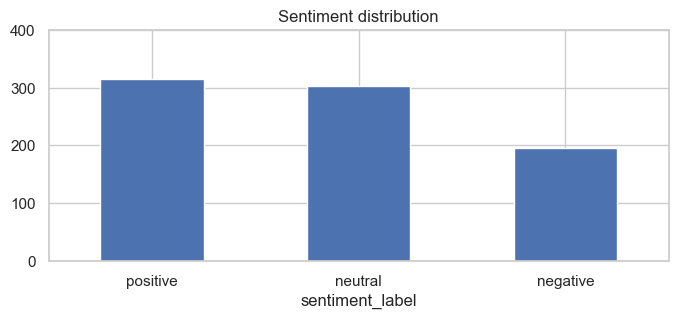

In [491]:
print(reddit_df.sentiment_label.value_counts())

# Plot barchart for reddit_df
reddit_df.sentiment_label.value_counts().plot(kind = 'bar',
                                            title = 'Sentiment distribution',
                                            ylim = [0, 400],        
                                            rot = 0, fontsize = 11, figsize = (8,3))

For the sampled data:

sentiment_label
positive    157
neutral     137
negative    106
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution (Sample)'}, xlabel='sentiment_label'>

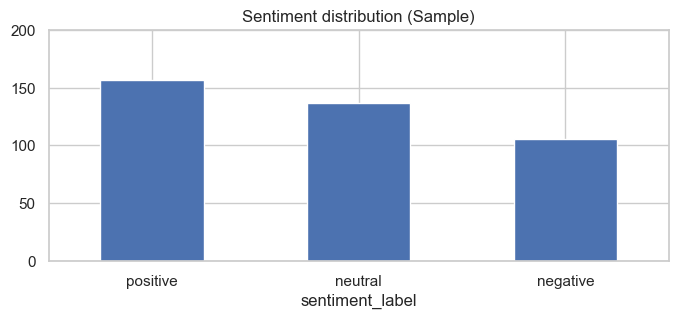

In [492]:
print(reddit_df_sample.sentiment_label.value_counts())

# Plot barchart for reddit_df
reddit_df_sample.sentiment_label.value_counts().plot(kind = 'bar',
                                                    title = 'Sentiment distribution (Sample)',
                                                    ylim = [0, 200],        
                                                    rot = 0, fontsize = 11, figsize = (8,3))

---

### >>> Exercise 7
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<Axes: title={'center': 'Sentiment distribution (Sample)'}, xlabel='sentiment_label'>

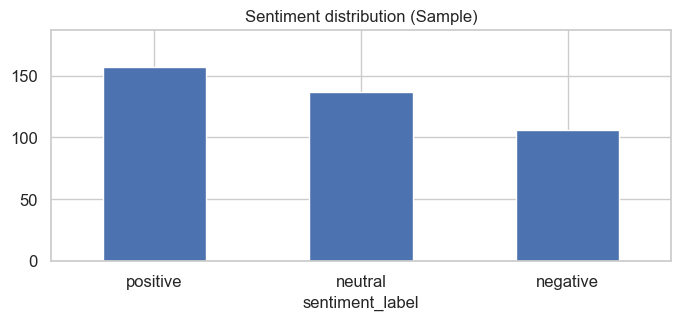

In [493]:
# Answer here
reddit_df_sample.sentiment_label.value_counts().plot(kind = 'bar',
                                                    title = 'Sentiment distribution (Sample)',
                                                    ylim = [0, reddit_df_sample.sentiment_label.value_counts().max() + 30], 
                                                    rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> Exercise 8
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise.

<Axes: title={'center': 'Sentiment distribution'}>

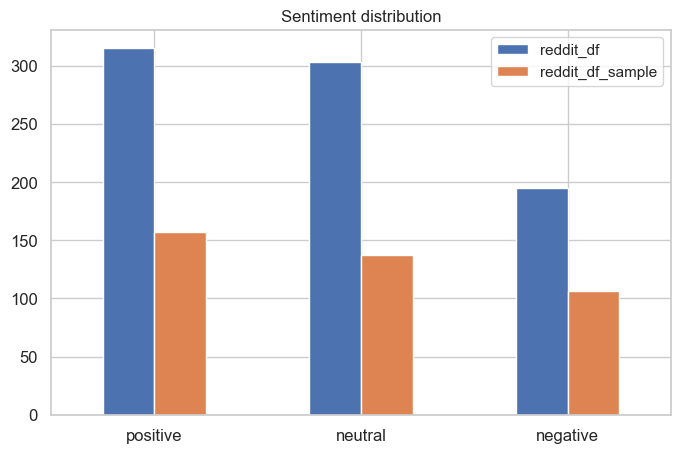

In [494]:
# Answer here
counts = pd.concat([reddit_df.sentiment_label.value_counts(), reddit_df_sample.sentiment_label.value_counts()], axis=1)
counts.columns = ['reddit_df', 'reddit_df_sample']

counts.plot(kind='bar',
            title='Sentiment distribution',
            xlabel='',
            rot=0,
            fontsize=12,
            figsize=(8,5))

---

### 5.2 Feature Creation
With NLTK, I'm going to create some features from the `text` field.

In [495]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

reddit_df['unigrams'] = reddit_df['text'].apply(lambda x: dmh.tokenize_text(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Banana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Banana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Here I'll preview some created unigrams:

In [496]:
reddit_df[0:4]["unigrams"]

0                                                                                                       [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, make, a, big, deal, about, starting, it, in, the, first, place, ?, No, c...
2                                                                                [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewriting, the, watercraft, rulebook, ., Their, collaboration, with, Shaun,...
Name: unigrams, dtype: object

In [497]:
list(reddit_df[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

### 5.3 Feature Subset Selection
I'll generate a document-term matrix from the original dataset.

In [498]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
reddit_df_counts = count_vect.fit_transform(reddit_df.text) # Learn the vocabulary and return document-term matrix
print(reddit_df_counts[0])

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3220))	1


We can create our own analyzers or even use the nltk analyzer that we previously built. To keep things tidy and minimal I'm going to use the default analyzer provided by `CountVectorizer`.

In [499]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# Tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

---

### >>> Exercise 9
Let's analyze the first record of our `reddit_df` dataframe with the new analyzer we have just built.

In [500]:
# Answer here
analyze(reddit_df.text[0])

['calls', 'on', 'retards']

---

Let's look closer at the term-document matrix we built above.

In [501]:
reddit_df_counts.shape

(813, 4313)

In [502]:
count_vect.get_feature_names_out()[0:10] # 10 feature names from the vectorizer

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [503]:
# we convert from sparse array to normal array
reddit_df_counts[10:15, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [504]:
count_vect.get_feature_names_out()[29]

'15'

We can see that the record with index=13 contains a `1` at the 30th position (index=29), which from our feature names we can deduce that this article contains exactly one `15` term. I'll verify this by looking into the record's text field.

In [505]:
reddit_df.text[13]

'I’ve been doing pretty good with this, but it’s heavy on fees. Looking for a similar risk return profile but any ideas on how to do it with less fees? I don’t want to sell calls by myself. Qdte 35% Upro 25% Tltw 15% Ispy 10% Brkb 10% Msci/Nvda 5%'

Indeed, there is exactly one `15` term in the text (in `Tltw 15%`).

---

### >>> Exercise 10
We said that the `1` at record with index=13 represents the `15` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [506]:
# Answer here
mask = reddit_df_counts[13, 0:100].indices
print(mask) # The corresponding indices are 8, 29, and 77, which mark the indices of the 2, 1, 1 we saw in the array
# We are interested in the term at index 77
print(count_vect.get_feature_names_out()[77]) # The answer: '25'

[ 8 77 29]
25


---

Let us look at a heat map of our term-document matrix.

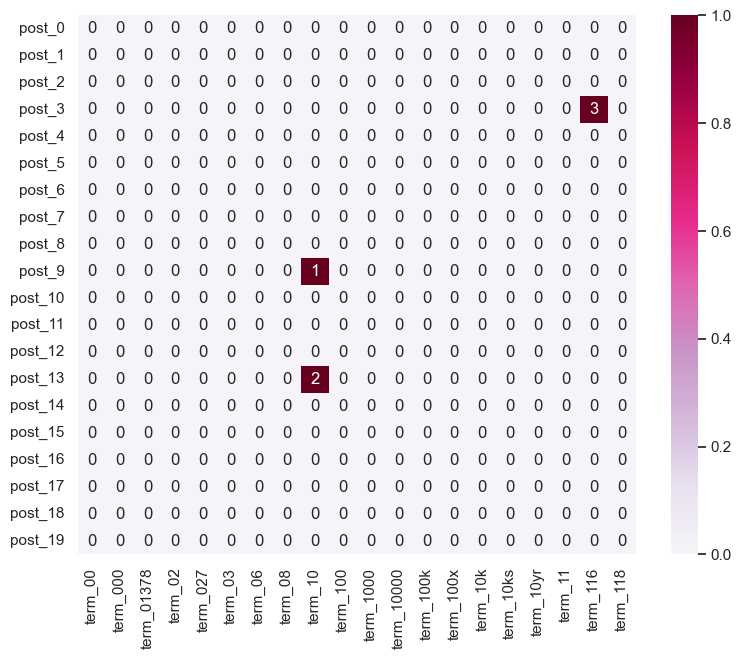

In [507]:
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["post_"+ str(i) for i in list(reddit_df.index)[0:20]]
plot_z = reddit_df_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

---

### >>> Exercise 11
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization.

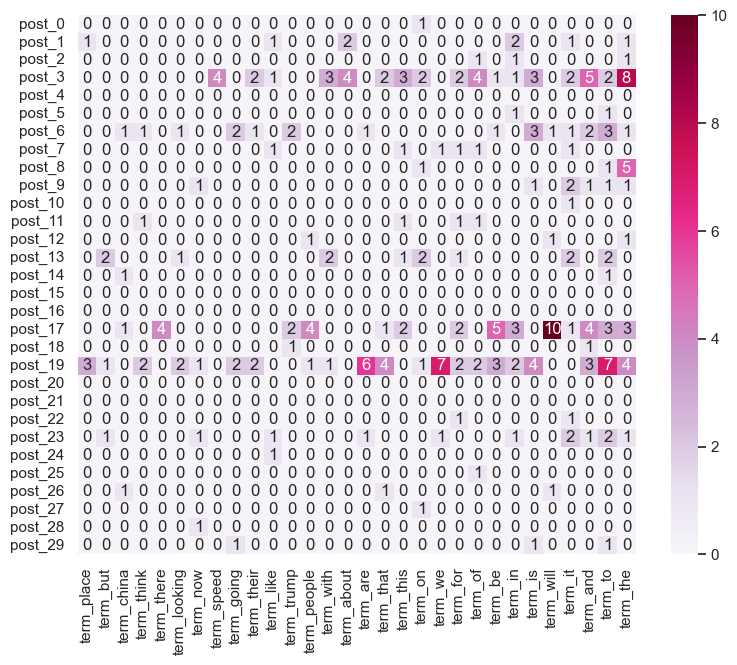

In [508]:
# Answer here
# For the first 30 posts, I can pick the top 30 terms most frequent in those posts and display them
import seaborn as sns

sub = reddit_df_counts[0:30, :]
voc_count = sub.sum(axis=0).A1
top_idx = np.argpartition(voc_count, -30)[-30:]

new_plot_x = [f"term_{i}" for i in count_vect.get_feature_names_out()[top_idx]]
new_plot_y = [f"post_{i}" for i in list(reddit_df.index)[0:30]]
new_plot_z = sub[:, top_idx].toarray()

df_todraw = pd.DataFrame(new_plot_z, columns = new_plot_x, index = new_plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=new_plot_z.max(), annot=True)

---

### 5.4 Attribute Transformation / Aggregation
Here I'm going to generate a simple distribution of the words found in all the entire set of articles. Let's get into it.

In [509]:
term_frequencies = reddit_df_counts.sum(axis=0).A1
term_frequencies[0]

np.int64(4)

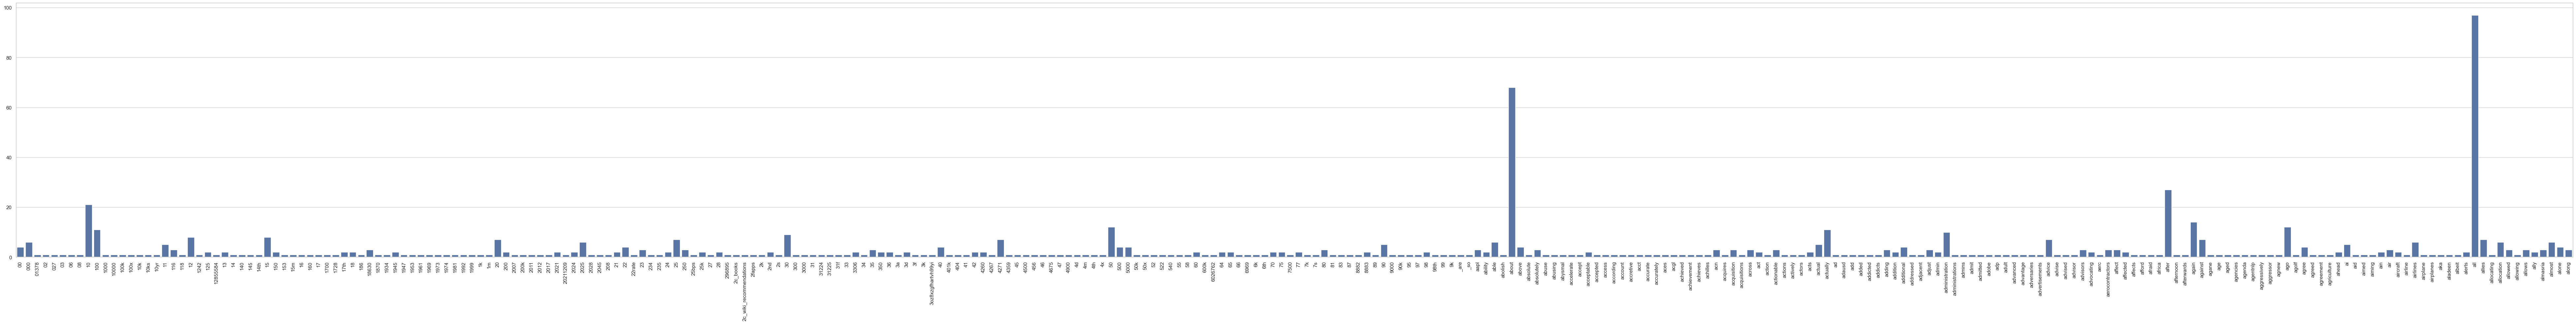

In [510]:
fig, ax = plt.subplots(figsize=(100, 10))
sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
ax.xaxis.set_tick_params(rotation=90)
plt.show()

---

### >>> Exercise 12
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [511]:
# Answer here
import plotly.express as px
sub = reddit_df_counts[:, :300]
voc_count = sub.sum(axis=0).A1
x_labels = [i for i in count_vect.get_feature_names_out()[:300]]
fig = px.bar(x=x_labels, y=voc_count, labels={'x': 'Term', 'y': 'Total Count'})
fig.show()

---

### >>> Exercise 13
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [512]:
# Answer here
# Reduce the number of terms to 30
sub = reddit_df_counts[:, :30]
voc_count = sub.sum(axis=0).A1
x_labels = [i for i in count_vect.get_feature_names_out()[:30]]
fig = px.bar(x=x_labels, y=voc_count, labels={'x': 'Term', 'y': 'Total Count'})
fig.show()

---

### >>> Exercise 14
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [513]:
# Answer here
voc_count_full = reddit_df_counts.sum(axis=0).A1
df_todraw = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "count": voc_count_full
})
df_sorted = df_todraw.sort_values("count", ascending=False, kind="mergesort", ignore_index=True)
fig = px.bar(df_sorted[:300], x='term', y='count') # Display the most frequent 300 terms
fig.show()

---

Since we already have those term frequencies, we can also transform the values in that vector into the log distribution.

In [514]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

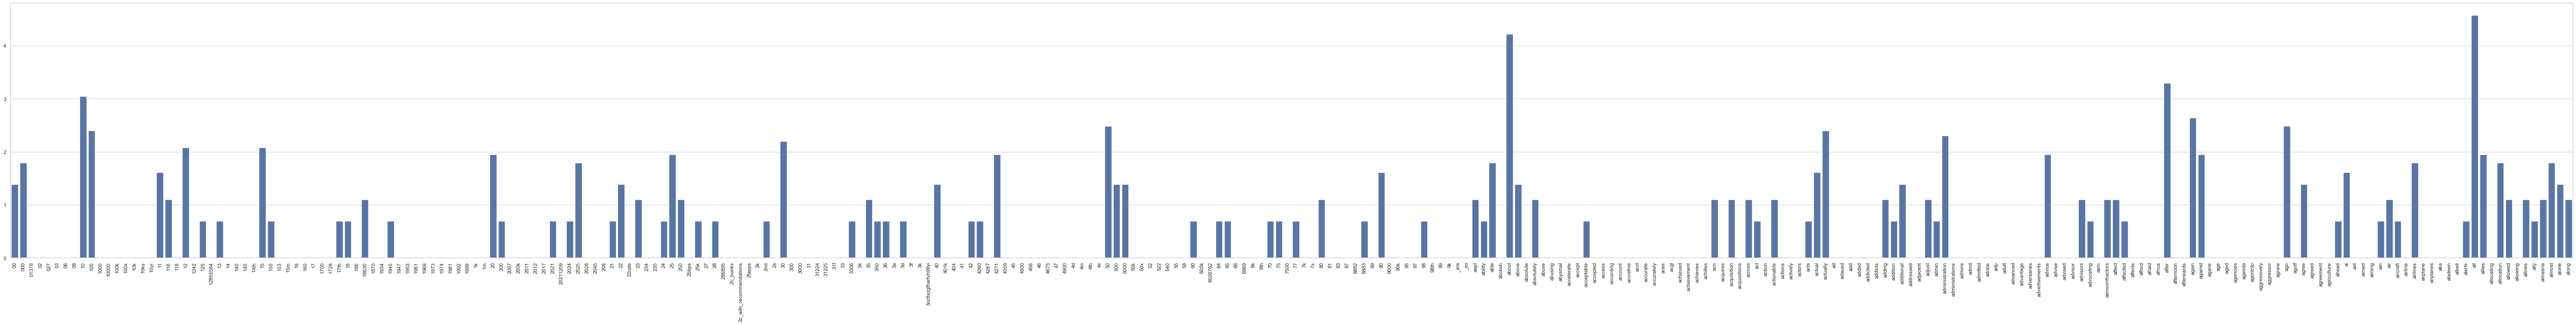

In [515]:
fig, ax = plt.subplots(figsize=(100, 10))
sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies_log[:300])
ax.xaxis.set_tick_params(rotation=90)
plt.show()

---

### >>> Exercise 15
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [516]:
# Answer here
# The distribution after the log transform looks more uniform, and low-frequency terms become visible, which helps us compare the low-frequency terms.
# The order stays the same, but the y axis becomes multiplicative, which is useful when the distribution spans multiple orders of magnitude.
import math
voc_count_full = reddit_df_counts.sum(axis=0).A1
df_todraw = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "count_log": [math.log(i) for i in voc_count_full]
})
df_sorted = df_todraw.sort_values("count_log", ascending=False, kind="mergesort", ignore_index=True)
fig = px.bar(df_sorted[:300], x='term', y='count_log', labels={'count_log': ''}) # Display the most frequent 300 terms
fig.show()

---

### >>> New Data Visualizations

1. Sentiment volume grouped by subreddits. We can see that in all four subreddits, there are more positive posts than negative posts. Particularly, in `r/stockstobuytoday`, there are more neutral posts than positive/negative ones, reflecting the subreddit's neutral/informative nature.

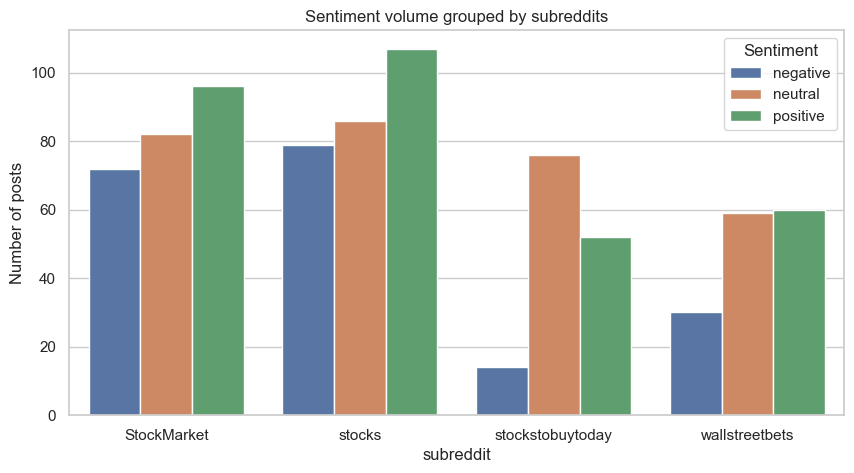

In [517]:
tally = reddit_df.groupby(['subreddit', 'sentiment_label']).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=tally, x='subreddit', y='count', hue='sentiment_label')
ax.set_title('Sentiment volume grouped by subreddits')
ax.set_ylabel('Number of posts')
plt.legend(title='Sentiment', loc='upper right')
plt.show()


2. Treemap of top 300 term frequencies. We can see that "the", "to", "and", and "is" combined form ~18% of all tokens. We can also see a long tail of other words, which fits our observations from previous term frequency plots.

In [533]:
voc_count_full = reddit_df_counts.sum(axis=0).A1
df_todraw = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "count": voc_count_full
})
df_sorted = df_todraw.sort_values("count", ascending=False, kind="mergesort", ignore_index=True).head(300)

fig = px.treemap(
    df_sorted, path=[px.Constant("All subreddits"), 'term'], values='count',
    color='count', color_continuous_scale='Blues',
    title='Top 300 term frequencies'
)
fig.update_traces(textinfo='label+value+percent root')
fig.show()

---

# Phase 2

In [ ]:
### Begin Assignment Here